<a href="https://colab.research.google.com/github/KevinTTruong/RNGvsML/blob/main/RNG_vs_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RNG vs Machine Learning (with Genshin Impact)

TODO:

-TensorFlow 

In [ ]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

## RNG Function

### Define contents of banner

In [ ]:
promotional_char = ["Featured 5*"]
featured_chars = ["Featured 1", "Featured 2", "Featured 3"]
standard_5_star = ["Keqing", "Mona", "Tighnari", "Qiqi", "Diluc", "Jean"]
standard_4_star_chars = ["Barbara", "Beidou", "Bennett", "Candance", "Chongyun", "Collei", 
                         "Diona", "Dori", "Fischl", "Gorou", "Kujou Sara", "Kuki Shinobu", 
                         "Layla" "Ningguang", "Noelle", "Razor", "Rosaria", "Sayu", 
                         "Shikanoin Heizou", "Sucrose", "Xiangling", "Xingqiu", "Xinyan", 
                         "Yanfei", "Yun Jin"]
standard_4_star_weapons = ["Dragon's Bane", "Eye of Preception", "Favonius Codex", 
                           "Favonius Greatsword", "Favonius Lance", "Favonius Sword", 
                           "Favonius Warbow", "Lion's Roar", "Rainslasher", "The Bell", 
                           "The Flute", "The Stringless", "The Widsith", "Rust", 
                           "Sacrificial Bow", "Sacrificial Fragments", "Sacrificial Greatesword", 
                           "Sacrificial Sword"]
standard_3_star_weapons = ["Black Tassel", "Bloodtainted Greatsword", "Cool Steel", 
                           "Debate Club", "Emerald Orb", "Ferrous Shadow", "Harbinger of Dawn", 
                           "Magic Guide", "Raven Bow", "Sharpshooter's Oath", "Skyrider Sword", 
                           "Slingshot", "Thrilling Tales of Dragon Slayers"]

### 5* Soft pity calculation

Pity formula based on statistical analysis

Source: https://www.hoyolab.com/article/1927875

In [ ]:
soft_pity = 73
p5 = 0.6
k = (100-0.6)/(90-73)
def five_star_chance(n):
  if n <= soft_pity:
    return p5
  else:
    return p5+k*(n-73)

View chances

In [ ]:
for i in range(73,91):
  print(str(i)+": "+str(five_star_chance(i)))

73: 0.6
74: 6.447058823529412
75: 12.294117647058824
76: 18.14117647058824
77: 23.98823529411765
78: 29.835294117647063
79: 35.682352941176475
80: 41.52941176470589
81: 47.3764705882353
82: 53.22352941176471
83: 59.070588235294125
84: 64.91764705882353
85: 70.76470588235294
86: 76.61176470588235
87: 82.45882352941177
88: 88.30588235294118
89: 94.15294117647059
90: 100.0


Plot pity chance

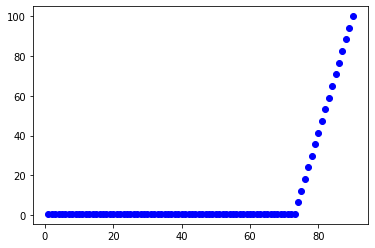

In [ ]:
x = list(range(1,91))
y = []
for i in range(1,91):
  y.append(five_star_chance(i))

plt.plot(x,y,'bo')

### Define roll_rng()

"5-Star Items
For Event Wish: Base probability of winning 5-star characters = 0.6%: consolidated probability (incl. guarentee) = 1.6%: guarenteed to win 5-star character at least once per 90 attempts.
The first time you win a 5-star in this event wish, there is a 50% chance it will be the promotional character. If the first 5-star character win in this event wish is not the promotional character, then the next 5-star character you win is guarenteed to be the promotional character

4-Star Items
For the Event Wish: Base probability of winning 4-star item = 5.1%: base probability of winning 4-star character = 2.55%, and base probability of winning 4-star weapon = 2.55%: consolidated probability (incl. guarentee) of winning 4-star item = 13%: guarenteed to win 4-star or above item at least once per 10 attempts: probability of winning 4-star item through guarantee = 99.4%, and probability of winning 5-star item through guarentee - 0.6%
The first time you win a 4-star item in this event wish, there is a 50% chance it will be one of the featured characters. If the first 4-star item you win in this event wish is not one of the featured characters, then the next 4-star item you win is guarenteed to be the featured character. When you win a featured 4-star item, the probability of obtaining each featured 4-star character is equal between all of them."

In [ ]:
pity_count_5 = 0
pity_count_4 = 0
fail_5 = False
fail_4 = False
p4 = 510

def roll_rng():
  global pity_count_4
  global pity_count_5 
  global fail_5
  global fail_4

  pity_count_4 += 1
  pity_count_5 += 1
  #Roll 5*
  roll = random.randrange(10000)
  five_star_roll = five_star_chance(pity_count_5)*100
  if roll < five_star_roll:
    #Calculate 50/50 if win
    save = pity_count_5
    pity_count_5 = 0  #Reset pity
    if fail_5 or random.randrange(2) == 1:  #50/50 won (5*)
      fail_5 = False
      return [save, "Character", promotional_char[0], pity_count_4, pity_count_5]
    else:
      char = standard_5_star[random.randrange(len(standard_5_star))]
      fail_5 = True
      return [save, "Character", char]
  #Roll 4*
  #4* pity or Win by rolling normally
  elif pity_count_4 >= 10 or (five_star_roll <= roll and roll < five_star_roll+p4):
    #Calculate 50/50
    save = pity_count_4
    pity_count_4 = 0  #Reset pity
    if fail_4 or random.randrange(2) == 1: #Win 50/50 (4*)
      fail_4 = False
      return [save, "Character", featured_chars[random.randrange(len(featured_chars))], pity_count_4, pity_count_5]
    else:
      fail_4 = True
      #Roll for either weapon or character (50/50)
      if roll < five_star_roll+(p4/2):  #Win 4* character
        char = standard_4_star_chars[random.randrange(len(standard_4_star_chars))]
        while char in featured_chars: #Make sure character is NOT a feature 4* chars
          char = standard_4_star_chars[random.randrange(len(standard_4_star_chars))]
        return [save, "Character", char, pity_count_4, pity_count_5]
      else: #five_star_roll+(p4/2) <= roll < five_star_roll+p4 ; Win 4* weapon
        return [save, "Weapon", standard_4_star_weapons[random.randrange(len(standard_4_star_weapons))], pity_count_4, pity_count_5]
  #Roll 3*
  else:
    return [1, "Weapon", standard_3_star_weapons[random.randrange(len(standard_3_star_weapons))], pity_count_4, pity_count_5]



### Reset helper

In [ ]:
def reset():
  global pity_count_4
  global pity_count_5 
  global fail_5
  global fail_4
  
  pity_count_5 = 0
  pity_count_4 = 0
  fail_5 = False
  fail_4 = False

### Testing/QA

Testing

-PASS Guarentee at 90 rolls

-PASS standard_4_star_weapons[random.randrange(len(standard_4_star_weapons))]] and similar formula works as intended

In [ ]:
for i in range(91):
  print(roll_rng())
reset()

[1, 'Weapon', 'Slingshot', 1, 1]
[1, 'Weapon', 'Skyrider Sword', 2, 2]
[1, 'Weapon', 'Harbinger of Dawn', 3, 3]
[1, 'Weapon', 'Debate Club', 4, 4]
[1, 'Weapon', 'Raven Bow', 5, 5]
[1, 'Weapon', 'Ferrous Shadow', 6, 6]
[1, 'Weapon', 'Cool Steel', 7, 7]
[1, 'Weapon', 'Slingshot', 8, 8]
[1, 'Weapon', 'Ferrous Shadow', 9, 9]
[10, 'Weapon', 'The Stringless', 0, 10]
[1, 'Weapon', 'Harbinger of Dawn', 1, 11]
[1, 'Weapon', 'Slingshot', 2, 12]
[1, 'Weapon', 'Skyrider Sword', 3, 13]
[1, 'Weapon', 'Black Tassel', 4, 14]
[1, 'Weapon', 'Ferrous Shadow', 5, 15]
[1, 'Weapon', 'Bloodtainted Greatsword', 6, 16]
[1, 'Weapon', 'Bloodtainted Greatsword', 7, 17]
[1, 'Weapon', 'Emerald Orb', 8, 18]
[1, 'Weapon', 'Magic Guide', 9, 19]
[10, 'Character', 'Featured 2', 0, 20]
[1, 'Weapon', 'Bloodtainted Greatsword', 1, 21]
[2, 'Character', 'Noelle', 0, 22]
[1, 'Weapon', 'Ferrous Shadow', 1, 23]
[1, 'Weapon', 'Debate Club', 2, 24]
[1, 'Weapon', 'Emerald Orb', 3, 25]
[1, 'Weapon', 'Bloodtainted Greatsword', 4, 26

### ***Roll Simulation

In [ ]:
def roll_simulation(amount):
  for i in range(amount):
    print(roll_rng()[2])

Set variables

In [ ]:
pity_count_5 = 34 #Starts counting at 0
pity_count_4 = 6
fail_5 = False
fail_4 = False

In [ ]:
roll_simulation(10)

Thrilling Tales of Dragon Slayers
Debate Club
Emerald Orb
Favonius Lance
Bloodtainted Greatsword
Skyrider Sword
Ferrous Shadow
Sharpshooter's Oath
Slingshot
Thrilling Tales of Dragon Slayers


In [ ]:
reset()

## Machine Learning Prediction

Testing model prediction

-Follows rules of banner (10 4* soft pity, 90 5* pity, bias toward featured characters)

-If failed, add pitys as columns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow import keras

### Import data

#### Option 1: Use Simulated rolls

In [ ]:
#Using Simulatation data temporarily
simulated_rolls = []
for i in range(1800):
  simulated_rolls.append(roll_rng())
reset()

In [ ]:
sim_data = pd.DataFrame(simulated_rolls,columns=["Pity","Type","Name", "4* Pity Count", "5* Pity Count"])
sim_data = sim_data.drop(columns=["Pity","Type"])
sim_data

,Name,4* Pity Count,5* Pity Count
0,Debate Club,1.0,1.0
1,Magic Guide,2.0,2.0
2,Skyrider Sword,3.0,3.0
3,Black Tassel,4.0,4.0
4,Magic Guide,5.0,5.0
...,...,...,...
1795,Slingshot,6.0,18.0
1796,Slingshot,7.0,19.0
1797,Emerald Orb,8.0,20.0
1798,Debate Club,9.0,21.0


#### Option 2: Import data

Before importing...

-Rewrite featured 4* characters as Featured 1/2/3

-Rewrite featured 5* characters as Featured 5*

-Update contents of banners if needed

In [ ]:
#Real roll data (up to 5/2022)
real_data = pd.read_excel("paimonmoe_wish_history.xlsx")
real_data.head()

,Type,Name,Time,⭐,Pity,#Roll,Group,Banner,Part
0,Weapon,Emerald Orb,2022-05-31 00:39:02,3,1,1,1,Discerner of Enigmas,NaN
1,Character,Featured 1,2022-05-31 00:39:02,4,2,2,1,Discerner of Enigmas,NaN
2,Weapon,Cool Steel,2022-05-31 00:39:02,3,1,3,1,Discerner of Enigmas,NaN
3,Weapon,Thrilling Tales of Dragon Slayers,2022-05-31 00:39:02,3,1,4,1,Discerner of Enigmas,NaN
4,Weapon,Debate Club,2022-05-31 00:39:02,3,1,5,1,Discerner of Enigmas,NaN


##### Convert pity to meet format

In [ ]:
pity_5_reformat = []
pity_4_reformat = []
p4_counter = 0
p5_counter = 0
for star, pity in zip(real_data["⭐"],real_data["Pity"]):
  p4_counter += 1
  p5_counter += 1
  pity_4_reformat.append(p4_counter)
  pity_5_reformat.append(p5_counter)
  if star == 4:
    p4_counter = 0
  elif star == 5:
    p5_counter = 0
real_data["4* Pity Count"] = pity_4_reformat
real_data["5* Pity Count"] = pity_5_reformat
real_data.head()

,Type,Name,Time,⭐,Pity,#Roll,Group,Banner,Part,4* Pity Count,5* Pity Count
0,Weapon,Emerald Orb,2022-05-31 00:39:02,3,1,1,1,Discerner of Enigmas,NaN,1,1
1,Character,Featured 1,2022-05-31 00:39:02,4,2,2,1,Discerner of Enigmas,NaN,2,2
2,Weapon,Cool Steel,2022-05-31 00:39:02,3,1,3,1,Discerner of Enigmas,NaN,1,3
3,Weapon,Thrilling Tales of Dragon Slayers,2022-05-31 00:39:02,3,1,4,1,Discerner of Enigmas,NaN,2,4
4,Weapon,Debate Club,2022-05-31 00:39:02,3,1,5,1,Discerner of Enigmas,NaN,3,5


In [ ]:
real_data = real_data.drop(columns=["Type","Time","⭐","Pity","#Roll","Group","Banner","Part"])
real_data.head()

,Name,4* Pity Count,5* Pity Count
0,Emerald Orb,1,1
1,Featured 1,2,2
2,Cool Steel,1,3
3,Thrilling Tales of Dragon Slayers,2,4
4,Debate Club,3,5


#### Convert to categorical data

Change categories to:

promotional_char

featured_chars

standard_5_star

standard_4_star_chars

standard_4_star_weapons

standard_3_star_weapons

In [ ]:
def revise_names(data):
  revised_names = []
  missing_name = False
  for name in data["Name"]:
    if name in standard_3_star_weapons: revised_names.append(0)
    elif name in standard_4_star_weapons: revised_names.append(1)
    elif name in standard_4_star_chars: revised_names.append(2)
    elif name in standard_5_star: revised_names.append(3)
    elif name in featured_chars: revised_names.append(4)
    elif name in promotional_char: revised_names.append(5)
    else: 
      missing_name = True
      print(name)
  assert not missing_name, "Please add these items to the contents of the banners"
  return revised_names

In [ ]:
def transform_data(data):
  data = add_pity(data)
  transformed_data = {}
  for i in range(0,len(data.columns)):
    transformed_data[data.columns[i]] = data[data.columns[i]].astype('category').cat.codes
  return pd.DataFrame(transformed_data).drop(columns=["Name"])

In [ ]:
def add_pity(data):
  pity_4 = False
  pity_5 = False
  pity_4_col = []
  pity_5_col = []
  for name in data["Name"]:
    pity_4_col.append(pity_4)
    pity_5_col.append(pity_5)
    if name in promotional_char: pity_5 = False
    elif name in standard_5_star: pity_5 = True
    elif name in featured_chars: pity_4 = False
    elif name in (standard_4_star_chars+standard_4_star_weapons): pity_4 = True
  data["4* Pity"] = pity_4_col
  data["5* Pity"] = pity_5_col
  return data

In [ ]:
#categories = {}
#cat_col = data["Name"].astype('category')
#for i in range(len(X["Name"])):
#  categoriesX["Name"][i]] = cat_col[i]
#categories = dict(sorted(categories.items()))

#categories = promotional_char + featured_chars + standard_5_star + standard_4_star_chars + standard_4_star_weapons + standard_3_star_weapons
#categories.sort()
categories = ["standard 3 star weapon", "standard 4 star weapons", "standard 4 star chars", "standard 5 star character",  "featured character", "promotional char"] 

categories

['standard 3 star weapon',
 'standard 4 star weapons',
 'standard 4 star chars',
 'standard 5 star character',
 'featured character',
 'promotional char']

#### Split data (non-random)

In [ ]:
sim_Y = revise_names(sim_data) 
#Y = X[X.columns[2]] #Name
sim_X = transform_data(sim_data)
sim_X.head(22)

,4* Pity Count,5* Pity Count,4* Pity,5* Pity
0,1,1,0,0
1,2,2,0,0
2,3,3,0,0
3,4,4,0,0
4,5,5,0,0
5,6,6,0,0
6,7,7,0,0
7,8,8,0,0
8,9,9,0,0
9,0,10,0,0


In [ ]:
real_Y = revise_names(real_data) 
#Y = X[X.columns[2]] #Name
real_X = transform_data(real_data)
real_X.head(12)

,4* Pity Count,5* Pity Count,4* Pity,5* Pity
0,0,0,0,0
1,1,1,0,0
2,0,2,0,0
3,1,3,0,0
4,2,4,0,0
5,3,5,0,0
6,4,6,0,0
7,5,7,0,0
8,6,8,0,0
9,7,9,0,0


In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(sim_X,sim_Y,test_size=0.2, shuffle=False)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(real_X,real_Y,test_size=0.2, shuffle=False)

### scikit-learn Models

In [ ]:
def score_model(model,name):
  scores = [model.score(X1_test, Y1_test), model.score(X2_test, Y2_test)]
  print(name+" average score: "+str(round((scores[0]+scores[1])/2*100, 2))+'%')
  print("-Test 1: "+str(round(scores[0]*100, 2))+'%')
  print("-Test 2: "+str(round(scores[1]*100, 2))+'%')

Linear Regression - Wrong model for this type of problem, requires reformatting pandas table

In [ ]:
lr_model_sim = LinearRegression().fit(X1_train,Y1_train)
lr_model_real = LinearRegression().fit(X2_train,Y2_train)

In [ ]:
score_model(lr_model_sim, "Linear Regression (simulated data)")
print()
score_model(lr_model_real,"Linear Regression (real data)")

Linear Regression (simulated data) average score: -14.08%
-Test 1: 24.86%
-Test 2: -53.02%

Linear Regression (real data) average score: -14.37%
-Test 1: -45.58%
-Test 2: 16.85%


Decision Tree

In [ ]:
dtc_model_sim = DecisionTreeClassifier().fit(X1_train,Y1_train)
dtc_model_real = DecisionTreeClassifier().fit(X2_train,Y2_train)

In [ ]:
score_model(dtc_model_sim,"Decision Tree Classifier (simualted data)")  #Failed: mono-3_star
print()
score_model(dtc_model_real,"Decision Tree Classifier (real data)")  #Working model

Decision Tree Classifier (simualted data) average score: 83.35%
-Test 1: 95.0%
-Test 2: 71.7%

Decision Tree Classifier (real data) average score: 73.73%
-Test 1: 64.44%
-Test 2: 83.02%


#### Roll with Model

In [ ]:
X1_test.head()

,4* Pity Count,5* Pity Count,4* Pity,5* Pity
1440,7,41,0,0
1441,8,42,0,0
1442,9,43,0,0
1443,0,44,0,0
1444,1,45,1,0


In [ ]:
def roll_scikit_model(model):

  global pity_count_5
  global pity_count_4
  global fail_5
  global fail_4

  #categories = ["standard 3 star weapon", "standard 4 star weapons", "standard 4 star chars", "standard 5 star character",  "featured character", "promotional char"]
  prediction_category = model.predict(pd.DataFrame([[pity_count_4, pity_count_5, fail_4, fail_5]],columns=["4* Pity Count","5* Pity Count", "4* Pity","5* Pity"]))[0]
  print(categories[prediction_category])
  pity_count_4 += 1
  pity_count_5 += 1

  if prediction_category == 1 or prediction_category == 2:
    pity_count_4 = 0
    fail_4 = True
  elif prediction_category == 3:
    pity_count_5 = 0
    fail_5 = True
  elif prediction_category == 4:
    pity_count_4 = 0
    fail_4 = False
  elif prediction_category == 5:
    pity_count_5 = 0
    fail_5 = False
  #else prediction_category == 0: pass

#### Run Roll

Set variables

In [ ]:
pity_count_5 = 34 #Starts counting at 0
pity_count_4 = 6
fail_5 = False
fail_4 = False

In [ ]:
roll_amount = 10
for i in range(roll_amount):
  roll_scikit_model(dtc_model_real)

standard 3 star weapon
standard 3 star weapon
featured character
standard 3 star weapon
standard 3 star weapon
standard 3 star weapon
standard 3 star weapon
standard 3 star weapon
standard 3 star weapon
standard 3 star weapon


### TensorFlow Models

DecisionTree and Regression models don't working. Using a One-to-Many Sequence Prediction model.

Source: https://wandb.ai/ayush-thakur/dl-question-bank/reports/LSTM-RNN-in-Keras-Examples-of-One-to-Many-Many-to-One-Many-to-Many---VmlldzoyMDIzOTM

Define training data here:

In [ ]:
#Define training data here:
def revise_cat(Y_data):
  revised_names = []
  for cat in Y_data:
    if cat == 0: revised_names.append(categories[0])
    elif cat == 1: revised_names.append(categories[1])
    elif cat == 2: revised_names.append(categories[2])
    elif cat == 3: revised_names.append(categories[3])
    elif cat == 4: revised_names.append(categories[4])
    elif cat == 5: revised_names.append(categories[5])
  return revised_names

X = tf.convert_to_tensor(X2_train)
Y = tf.convert_to_tensor(Y2_train)
X_test = tf.convert_to_tensor(X2_test)
Y_test = Y2_test

#### Train models

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(4,)))
model.add(Dense(2))

model.compile(optimizer='adam', loss='mse')

#wandb.init(entity='ayush-thakur', project='dl-question-bank')

model.fit(X, Y, epochs=1000, validation_split=0.2)


ValueError: ignored

Simple MLP

In [ ]:
MLP = Sequential()
MLP.add(keras.layers.Input(shape=(4,)))
MLP.add(keras.layers.Dense(400, activation="relu"))
MLP.add(keras.layers.Dense(150, activation="relu"))
MLP.add(keras.layers.Dense(50, activation="sigmoid"))
MLP.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
MLP.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
MLP.fit(X, Y, epochs=50, validation_split=0.2, shuffle=False)

#### Score model

In [ ]:
def score_tf_model(model):
  score = 0
  i = 0
  mono = True
  print(model.predict(X_test).argmax(axis=-1))
  for prediction in model.predict(X_test):
    #print(categories[int(prediction)]+" "+str(Y_test[i]))
    #print(prediction)
    if int(prediction) != 0: mono = False
    if int(prediction) == Y_test[i]: score += 1
    i+=1
  score /= len(X_test)
  if mono: print("Model predicts all 0!")
  else: print("Accuracy: "+str(round(score*100, 2))+"%")
  return score
#print("Model Accuracy: "+str(round(score*100, 2))+"%")

In [ ]:
score_tf_model(MLP)
pass

2/2 [==============================] - 0s 8ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2/2 [==============================] - 0s 7ms/step
Model predicts all 0!
